# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [4]:
iris = load_iris()

x = iris.data
y = iris.target

In [5]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=2022)

In [8]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

## **length끼리, width끼리**

In [9]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [10]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [11]:
tr_x_l.shape, tr_x_w.shape

((135, 2), (135, 2))

In [12]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [15]:
train_y.shape

(135, 3)

## Modeling : multi-input & Concatenate layer

In [17]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [18]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

## 모델 시각화

In [20]:
from tensorflow.keras.utils import plot_model

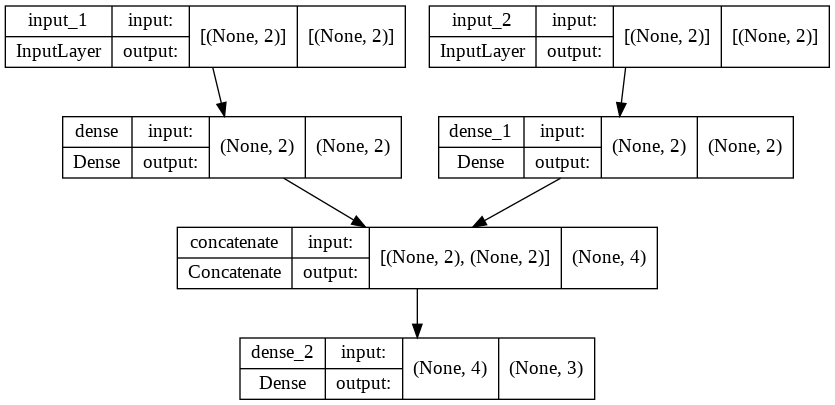

In [21]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [115]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=3,
                   verbose=1,
                   restore_best_weights=True)

In [116]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.1,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.4108 - accuracy: 0.9421 - val_loss: 0.3436 - val_accuracy: 1.0000
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4086 - accuracy: 0.9587 - val_loss: 0.3428 - val_accuracy: 1.0000
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4066 - accuracy: 0.9587 - val_loss: 0.3417 - val_accuracy: 1.0000
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4045 - accuracy: 0.9587 - val_loss: 0.3393 - val_accuracy: 1.0000
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4029 - accuracy: 0.9587 - val_loss: 0.3368 - val_accuracy: 1.0000
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.4006 - accuracy: 0.9587 - val_loss: 0.3356 - val_accuracy: 1.0000
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.3986 - accuracy: 0.9587 - val_loss: 0.3346 - val_accuracy: 1.0000
Epoch 8/1000


---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [ ]:
iris = load_iris()

x = iris.data
y = iris.target

In [ ]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

## train set, test set 구분하기

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.1, random_state=2022)

## **length끼리, width끼리**

In [30]:
df_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [61]:
x_train_length = x_train.loc[:, ['sepal length (cm)', 'petal length (cm)']]
x_train_width = x_train.loc[:, ['sepal width (cm)', 'petal width (cm)']]

In [60]:
x_test_length = x_test.loc[:, ['sepal length (cm)', 'petal length (cm)']]
x_test_width = x_test.loc[:, ['sepal width (cm)', 'petal width (cm)']]

## One-hot Encoding

In [34]:
n = len(np.unique(y))

In [67]:
y_train = to_categorical(y_train, n)
y_test = to_categorical(y_test, n)

In [36]:
y.shape

(150, 3)

## Modeling : multi-input & Concatenate layer

In [108]:
keras.backend.clear_session()

il_length = keras.layers.Input(shape=(2,))
hl_length = keras.layers.Dense(16, activation='relu')(il_length)

il_width = keras.layers.Input(shape=(2,))
hl_width = keras.layers.Dense(16, activation='relu')(il_width)

cl = keras.layers.Concatenate()([hl_length, hl_width])
ol = keras.layers.Dense(3, activation='softmax')(cl)

model = keras.models.Model([il_length, il_width], ol)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           48          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 16)           48          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [109]:
from tensorflow.keras.utils import plot_model

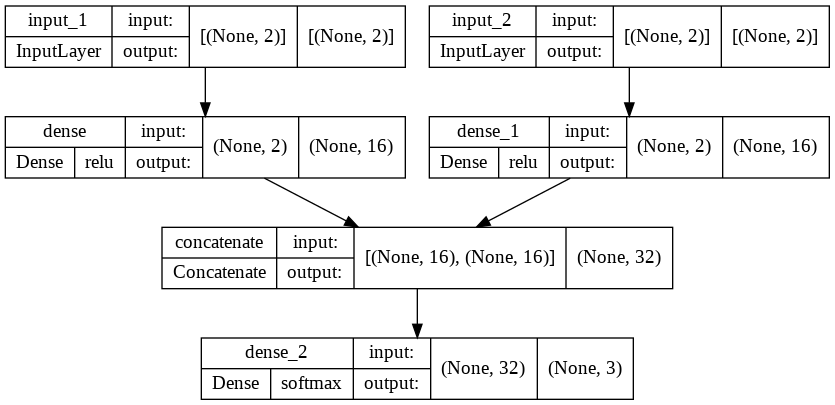

In [110]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## 학습 시켜보기!

In [111]:
x_train_length.shape, x_train_width.shape

((135, 2), (135, 2))

In [112]:
y_train.shape

(135, 3)

In [113]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   restore_best_weights=True)

In [114]:
model.fit([x_train_length, x_train_width],
          y_train,
          epochs= 1000,
          verbose=1,
          callbacks=[es], validation_split=0.1)

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 1.9662 - accuracy: 0.3471 - val_loss: 2.1179 - val_accuracy: 0.2143
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.7969 - accuracy: 0.3471 - val_loss: 1.9094 - val_accuracy: 0.2143
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.6360 - accuracy: 0.3471 - val_loss: 1.7178 - val_accuracy: 0.2143
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.4840 - accuracy: 0.3471 - val_loss: 1.5492 - val_accuracy: 0.2143
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.3595 - accuracy: 0.3471 - val_loss: 1.4045 - val_accuracy: 0.2143
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.2592 - accuracy: 0.3471 - val_loss: 1.2843 - val_accuracy: 0.2143
Epoch 7/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.1761 - accuracy: 0.3471 - val_loss: 1.1902 - val_accuracy: 0.2143
Epoch 8/1000
